## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Create a function which adds two numbers

Create a function add_numbers which adds two numbers. Demonstrate in a seperate cell that your function works.

In [1]:
def add_numbers(a,b):
    return a + b

# Use: print add_numbers(2,3) should return 5.
print (add_numbers(2,3))

5


In [2]:
print('hello')

hello


## Problem 3: Load in sales data using Pandas Library 

In [16]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import numpy as np
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline
size = 500

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 3, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

/Users/verayujiefeng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x113b47278>,
 'caps': [<matplotlib.lines.Line2D at 0x113b59da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x113b5ffd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x113b5f780>,
 'whiskers': [<matplotlib.lines.Line2D at 0x113b47cc0>,
  <matplotlib.lines.Line2D at 0x113b91eb8>]}

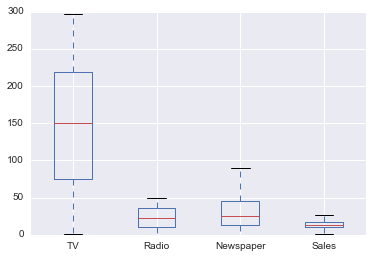

In [6]:
df.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)

### Problem 3, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

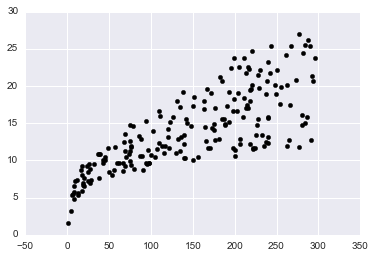

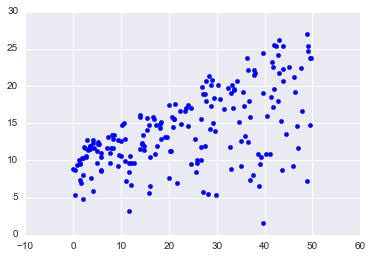

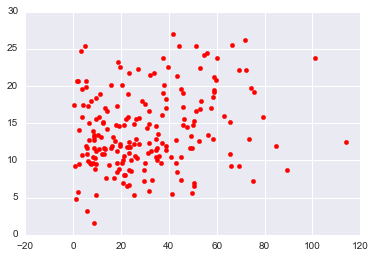

In [15]:
plt.scatter(df.TV,df.Sales, color= "black")
plt.show()
plt.scatter(df.Radio,df.Sales, color= "blue")
plt.show()
plt.scatter(df.Newspaper, df.Sales, color= "red")
plt.show()

In [20]:
from pandas.tools.plotting import scatter_matrix 

Which of the variables seem correlated with one another? Which don't? Explain your answer

My answer: The investment in advertising seems strongly related to the the sales because the points concentrate in an orderly pattern that seems to suggest a positive sloped line.

### Probelm 3, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [22]:
from sklearn.linear_model import LinearRegression

# Set y to be the sales in df
y=df.Sales

# Set X to be just the features described above in df.
X=df

# Split data into training and testing here
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Train Model using LinearRegressioon's .fit() 
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions on Test set using .predict()
def _ll_nb2(y, X,beta):
     mu = np.exp(np.dot(X,beta))
     ll = poisson.logpmf(y, mu)
     return ll
from statsmodels.base.model import GenericLikelihoodModel
class NBin(GenericLikelihoodModel):
     def __init__(self, endog, exog, **kwds):
         super(NBin, self).__init__(endog, exog, **kwds) 
     def nloglikeobs(self, params): 
         ll = _ll_nb2(self.endog, self.exog, params)
         return -ll
     def fit(self, start_params=None, maxiter=100000, maxfun=5000, **kwds):
         if start_params == None:
             # Reasonable starting values
             start_params = [0.001,0,0,0,0,0]
             start_params[0] = np.log(self.endog.mean())
         return super(NBin, self).fit(start_params=start_params,
                                      maxiter=maxiter, maxfun=maxfun,
                                      **kwds)
     def predict(self,exog):
         print ("hello")
         return super(NBin,self).predict(exog)

mod = NBin(y_train, X_train)
res = mod.fit()

# Evaluate perforamnce using R^2 and RMSE
predictions = np.exp(np.dot(X_test.values,res.params))
SSreg = np.mean((predictions - y_test) ** 2)
SStot =  np.mean((y_test - np.mean(y_test)) ** 2)
print (1 - SSreg/SStot)


ValueError: shapes (200,4) and (6,) not aligned: 4 (dim 1) != 6 (dim 0)

### Bonus: How could you have improved performance?

## Problem 4:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


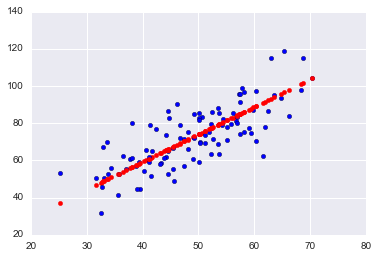

In [39]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
        
run(100)


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


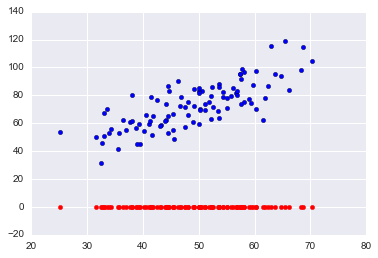

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


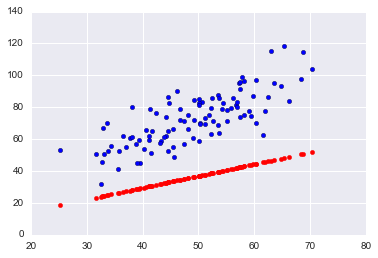

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


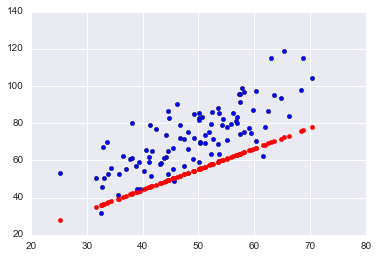

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


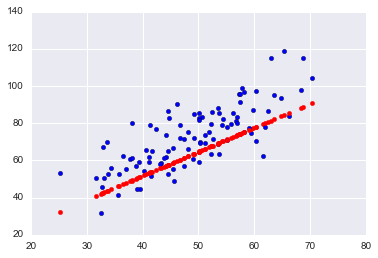

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


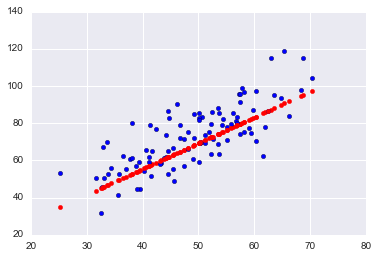

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


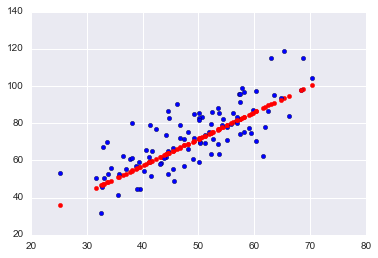

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


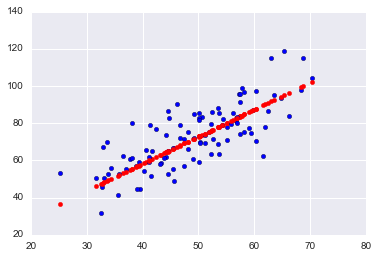

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


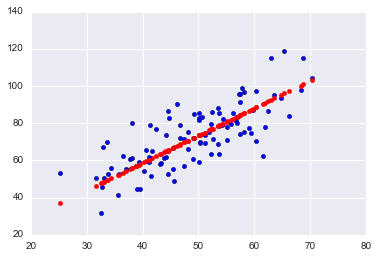

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


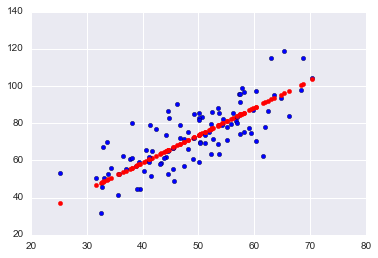

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


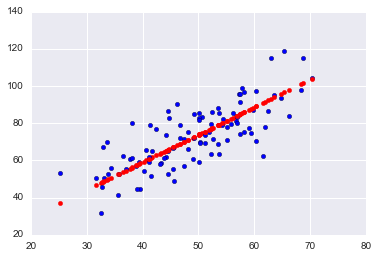

In [38]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
    plt.show()


My answer: Yes, the regression line converges and it stablizes after 9 iterations. It might be the learning rate being too small. 
